In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib notebook
import datetime as dt

In [2]:
df = pd.read_csv("newark.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df["tip_rate"] = df["tip_amount"] / df["fare_amount"]

In [4]:
df["my_dates"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["day_of_week"] = df["my_dates"].dt.weekday_name
df["time"] = df["my_dates"].dt.time

In [5]:
df = df[(((df["pickup_longitude"] >= -74.25) & (df["pickup_longitude"] <= -73.75)) & \
         ((df["pickup_latitude"] >= 40.6) & (df["pickup_latitude"] <= 40.9))) & \
        (((df["dropoff_longitude"] >= -74.25) & (df["dropoff_longitude"] <= -73.75)) & \
         ((df["dropoff_latitude"] >= 40.6) & (df["dropoff_latitude"] <= 40.9)))]

In [ ]:
'''
newark = df[(((df["pickup_longitude"] >= -74.186) & (df["pickup_longitude"] <= -74.175)) & \
             ((df["pickup_latitude"] >= 40.687) & (df["pickup_latitude"] <= 40.697))) | \
            (((df["dropoff_longitude"] >= -74.186) & (df["dropoff_longitude"] <= -74.175)) & \
             ((df["dropoff_latitude"] >= 40.687) & (df["dropoff_latitude"] <= 40.697)))]
'''

In [7]:
newark = df[(((df["pickup_longitude"] < -74.186) | (df["pickup_longitude"] > -74.175)) & \
             ((df["pickup_latitude"] < 40.687) | (df["pickup_latitude"] > 40.697))) & \
            (((df["dropoff_longitude"] >= -74.186) & (df["dropoff_longitude"] <= -74.175)) & \
             ((df["dropoff_latitude"] >= 40.687) & (df["dropoff_latitude"] <= 40.697)))]

In [8]:
newark = newark[newark["RatecodeID"] != 5]

In [9]:
newark = newark[newark["trip_distance"] > 5]

In [10]:
newark = newark[newark["tip_rate"] > 0.5]

In [11]:
stations = set()

for idx, row in newark.iterrows():
    origin = (row["pickup_longitude"], row["pickup_latitude"])
    destination = (row["dropoff_longitude"], row["dropoff_latitude"])
    
    stations.add(origin)
    stations.add(destination)

In [12]:
diction = {}
c = 0
for i in stations:
    c += 1
    diction[i] = c

position = {}
c = 0
for i in stations:
    c += 1
    position[c] = i

G = nx.Graph()

for k, v in diction.items():
    G.add_node(v, lat=k[1], long=k[0])

In [13]:
for idx, row in newark.iterrows():
    origin = (row["pickup_longitude"], row["pickup_latitude"])
    destination = (row["dropoff_longitude"], row["dropoff_latitude"])
    
    G.add_edge(diction[origin], diction[destination])

<IPython.core.display.Javascript object>


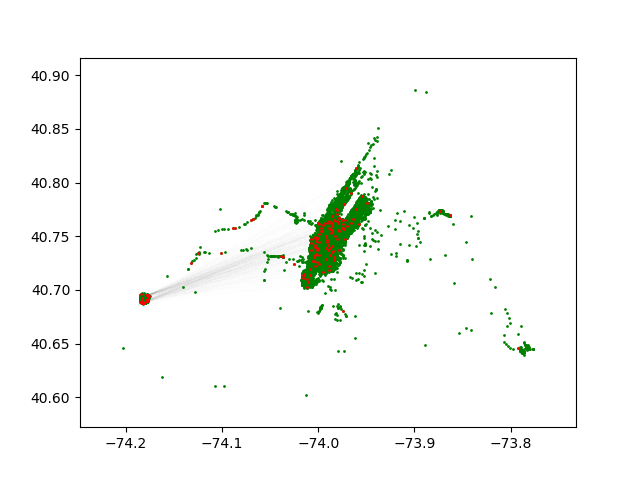

In [14]:
nx.draw_networkx(G, pos=position, node_color="green", edge_color="black", \
                 width=0.00005, node_size=1, with_labels=False)

In [15]:
rich_newark = newark[newark["tip_rate"] > 2]
stations2 = set()

for idx, row in rich_newark.iterrows():
    origin = (row["pickup_longitude"], row["pickup_latitude"])
    destination = (row["dropoff_longitude"], row["dropoff_latitude"])
    
    stations2.add(origin)
    stations2.add(destination)

In [16]:
diction2 = {}
c = 0
for i in stations2:
    c += 1
    diction2[i] = c

position2 = {}
c = 0
for i in stations2:
    c += 1
    position2[c] = i

G2 = nx.Graph()

for k, v in diction2.items():
    G2.add_node(v, lat=k[1], long=k[0])

In [17]:
for idx, row in rich_newark.iterrows():
    origin = (row["pickup_longitude"], row["pickup_latitude"])
    destination = (row["dropoff_longitude"], row["dropoff_latitude"])
    
    G2.add_edge(diction[origin], diction[destination])

In [18]:
nx.draw_networkx(G2, pos=position, node_color="red", edge_color="black", \
                 width=0.00001, node_size=1, with_labels=False)